In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
print(titanic_data.shape)

(887, 8)


## Analyzing Data

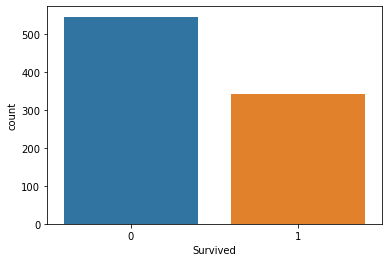

In [5]:
sns.countplot(x='Survived' , data=titanic_data)

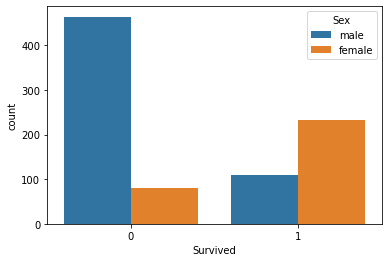

In [6]:
sns.countplot(x='Survived',hue='Sex' , data=titanic_data)

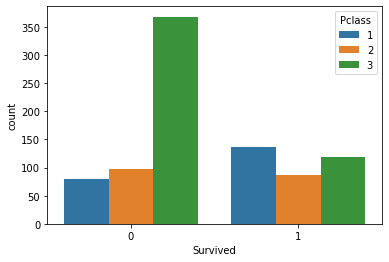

In [7]:
sns.countplot(x='Survived',hue = 'Pclass'  , data=titanic_data)

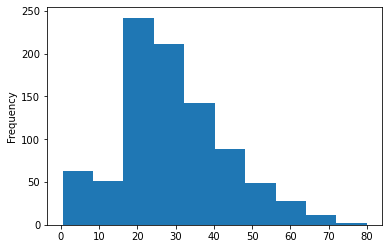

In [8]:
titanic_data['Age'].plot.hist()

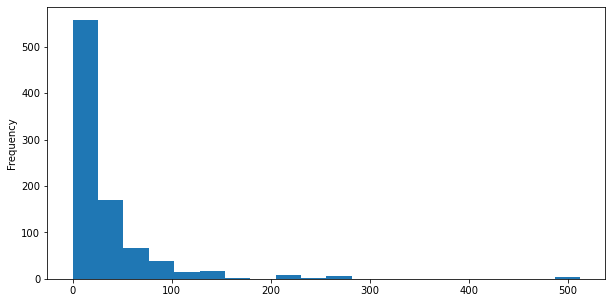

In [14]:
titanic_data['Fare'].plot.hist(bins=20 , figsize=(10,5))

In [15]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 48.6+ KB


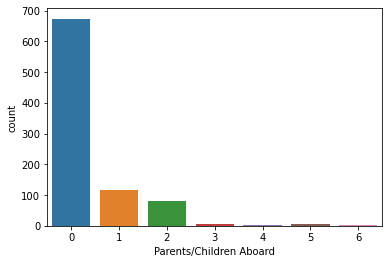

In [17]:
sns.countplot(x='Parents/Children Aboard' , data=titanic_data)

## Data Wrangling

In [18]:
titanic_data.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


In [19]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [20]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
Pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl.head(10)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
5,0,1
6,0,0
7,0,1
8,0,1
9,1,0


In [35]:
titanic_data = pd.concat([titanic_data,sex,Pcl],axis=1)

In [36]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [37]:
titanic_data.drop(['Sex','Name','Pclass'],axis=1,inplace=True)

In [39]:
titanic_data.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


## Train Data

In [44]:
y = titanic_data['Survived']
X = titanic_data.drop('Survived',axis=1)

In [42]:
from sklearn import model_selection

In [45]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.3 , random_state=3)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
Log_reg = LogisticRegression()

In [49]:
Log_reg.fit(X_train,y_train)

c:\users\avinash\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = Log_reg.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.86      0.83       161\n           1       0.77      0.69      0.73       106\n\n    accuracy                           0.79       267\n   macro avg       0.79      0.78      0.78       267\nweighted avg       0.79      0.79      0.79       267\n'

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test,predictions)

array([[139,  22],
       [ 33,  73]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score


In [58]:
accuracy_score(y_test,predictions)

0.7940074906367042

## SUV Predictions

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
dataset = pd.read_csv('SUV_predictions.csv')

In [61]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [62]:
import seaborn as sns

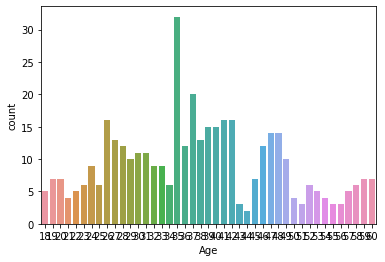

In [67]:
sns.countplot(x = 'Age' , data=dataset  )

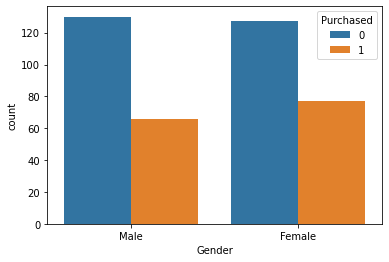

In [71]:
sns.countplot(x = 'Gender' , hue ='Purchased'  , data=dataset  )

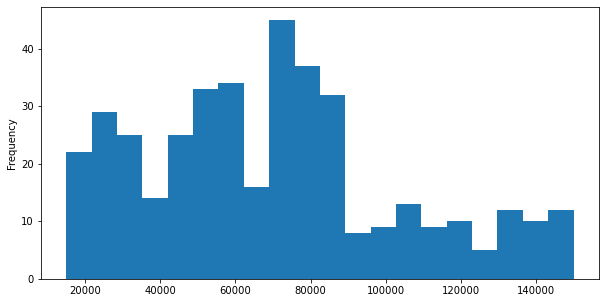

In [72]:
dataset['EstimatedSalary'].plot.hist(bins=20 , figsize=(10,5))

In [74]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [75]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [76]:
from sklearn import model_selection

In [77]:
X_train,X_test , y_train , y_test = model_selection.train_test_split(X , y , test_size = 0.2 , random_state = 4)

In [79]:
from sklearn.preprocessing import StandardScaler


In [80]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression


In [82]:
LR = LogisticRegression()

In [83]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
predictions = LR.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_test,predictions)*100

90.0

In [88]:
from sklearn.metrics import confusion_matrix


In [89]:
confusion_matrix(y_test,predictions)

array([[54,  5],
       [ 3, 18]], dtype=int64)